<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/Curvature_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

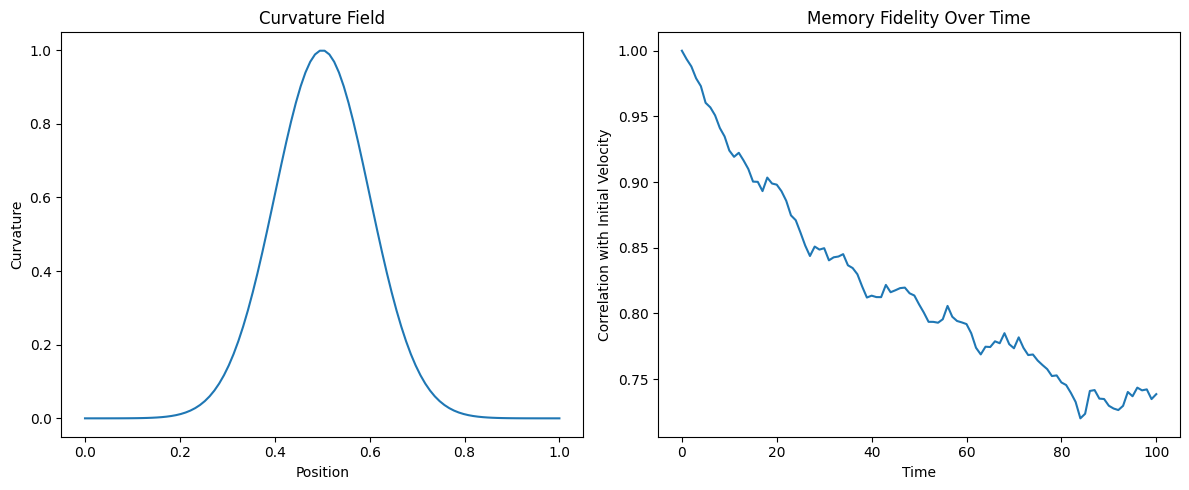

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
N = 100             # Number of particles
T = 100             # Timesteps
x = np.linspace(0, 1, N)
v0 = np.sin(2 * np.pi * x)  # Structured initial memory (velocity pattern)

# Curvature field: Gaussian bump
def curvature_field(x, center=0.5, width=0.1):
    return np.exp(-((x - center)**2) / (2 * width**2))

curvature = curvature_field(x)

# Memory diffusion model: curvature slows decoherence
def evolve_with_curvature(v, curvature, steps):
    trajectory = [v.copy()]
    for t in range(steps):
        noise = np.random.randn(N) * (1 - curvature) * 0.1  # Less noise in high curvature
        v += noise
        trajectory.append(v.copy())
    return np.array(trajectory)

# Run simulation
traj = evolve_with_curvature(v0.copy(), curvature, T)

# Memory fidelity: correlation with initial state
fidelity = [np.corrcoef(v0, vt)[0, 1] for vt in traj]

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Curvature Field")
plt.plot(x, curvature)
plt.xlabel("Position")
plt.ylabel("Curvature")

plt.subplot(1, 2, 2)
plt.title("Memory Fidelity Over Time")
plt.plot(fidelity)
plt.xlabel("Time")
plt.ylabel("Correlation with Initial Velocity")
plt.tight_layout()
plt.show()
